In [1]:
import cv2
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [2]:
def load_dataset(folder_path, img_size=(48,48)):
    images = []
    labels = []
    class_id = 0
    for dirname in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, dirname)
        if os.path.isdir(subfolder_path):
            for filename in os.listdir(subfolder_path):
                if filename.endswith('.jpg'):
                    img_path = os.path.join(subfolder_path, filename)
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, img_size)
                    images.append(img)
                    labels.append(class_id)
            class_id += 1
    return np.array(images), np.array(labels)

# Load datasets
X_train, y_train = load_dataset('train')
X_test, y_test = load_dataset('test')

In [3]:
# Reshape dan normalize
X_train = X_train.reshape([-1, 48, 48, 1]) / 255.0
X_test = X_test.reshape([-1, 48, 48, 1]) / 255.0

In [5]:
# One-hot encode labels
import tensorflow as tf

y_train = tf.one_hot(y_train, depth=7)
y_test = tf.one_hot(y_test, depth=7)

In [6]:
# Model
model = Sequential()

model.add(Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(48, 48, 1)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

In [8]:
# Optimizer Adam dan menambahkan EarlyStopping
opt = Adam(learning_rate=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Melatih model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
225/225 [==============================] - 87s 383ms/step - loss: 1.8504 - accuracy: 0.2324 - val_loss: 1.8942 - val_accuracy: 0.2471
Epoch 2/100
225/225 [==============================] - 89s 395ms/step - loss: 1.8414 - accuracy: 0.2317 - val_loss: 1.8838 - val_accuracy: 0.2471
Epoch 3/100
225/225 [==============================] - 90s 399ms/step - loss: 1.8370 - accuracy: 0.2363 - val_loss: 1.8578 - val_accuracy: 0.2471
Epoch 4/100
225/225 [==============================] - 89s 397ms/step - loss: 1.8336 - accuracy: 0.2399 - val_loss: 1.8397 - val_accuracy: 0.2471
Epoch 5/100
225/225 [==============================] - 95s 424ms/step - loss: 1.8195 - accuracy: 0.2381 - val_loss: 1.7954 - val_accuracy: 0.2583
Epoch 6/100
225/225 [==============================] - 109s 487ms/step - loss: 1.7923 - accuracy: 0.2590 - val_loss: 1.7784 - val_accuracy: 0.2756
Epoch 7/100
225/225 [==============================] - 120s 535ms/step - loss: 1.7566 - accuracy: 0.2825 - val_loss: 1.6904

In [9]:
# Evaluasi Model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy: ", accuracy)

225/225 [==============================] - 18s 78ms/step - loss: 0.0450 - accuracy: 0.9953
Test Accuracy:  0.9952632784843445


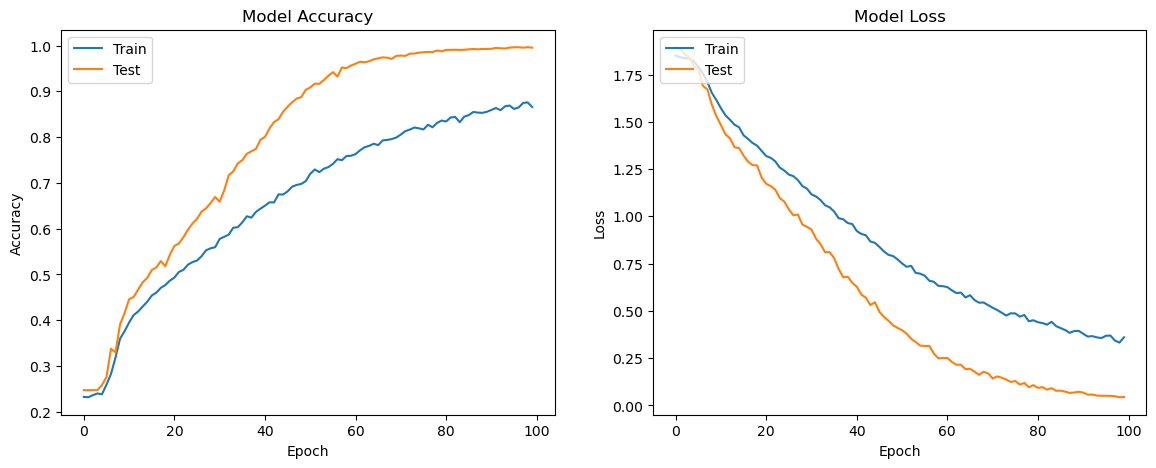

In [10]:
import matplotlib.pyplot as plt

# Akurasi
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [11]:
# Menyimpan model
model.save('my_model.h5')